In [1]:
# Necessary imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read "employee_turnover_data.csv" file and save it in a DataFrame called data
data = pd.read_csv('/data/employee_turnover_data.csv')

# Take a quick look to the first 5 rows of data
data.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
# Get some information on the types of variables in data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   satisfaction          14999 non-null  float64
 1   evaluation            14999 non-null  float64
 2   number_of_projects    14999 non-null  int64  
 3   average_montly_hours  14999 non-null  int64  
 4   time_spend_company    14999 non-null  int64  
 5   work_accident         14999 non-null  int64  
 6   churn                 14999 non-null  int64  
 7   promotion             14999 non-null  int64  
 8   department            14999 non-null  object 
 9   salary                14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


* The dataset has 10 columns and 14999 rows.
* There are no missing values in the dataset.
* `department` and `salary` are object types.

## Correlation matrix

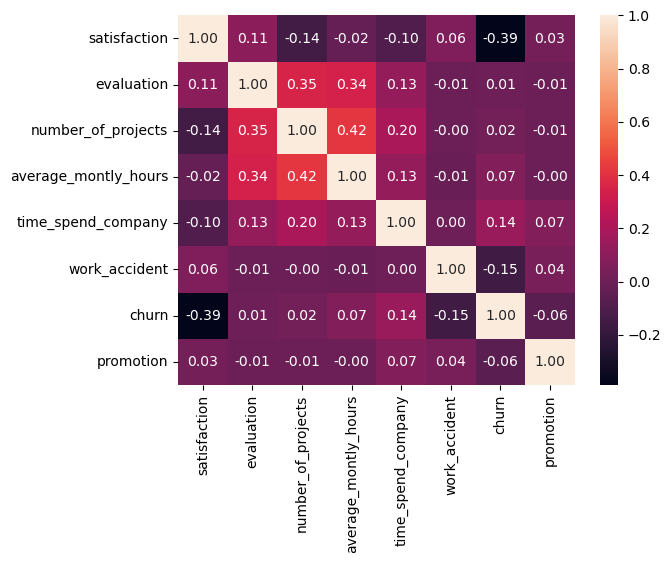

In [4]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()

* `churn` seems to be highly negatively correlated to `satisfaction`.
* This means that as the job satisfaction increases, churn rate decreases.

Now let us check the unique values of 'department' and 'salary' columns since they are of the type `object`.

## Transforming the categorical variables

In [5]:
# Print the unique values of the "department" column
print(data.department.unique())

# Print the unique values of the "salary" column
print('\n', data.salary.unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']

 ['low' 'medium' 'high']


* We note that `department` is a nominal categorical variable with 10 unique values and we will have to create dummy variables for this column.
* `salary` is an ordinal categorical variable with 3 values and we will have to type cast it from object type to categorical type.

Let us fix the data type of the `salary` column to make it ordinal categorical variable.

In [6]:
# Change the type of the "salary" column to categorical
data['salary'] = data['salary'].astype('category')

# Provide the correct order of categories
data.salary = data['salary'].cat.reorder_categories(['low', 'medium', 'high'])

# Encode categories with integer values
data.salary = data['salary'].cat.codes

Now we will transform the department variable, which we know is nominal, based on the values we observed. To do that, we will use `dummy variables`.

In [7]:
# Get dummies and save them inside a new DataFrame
departments = pd.get_dummies(data['department'])

# Take a quick look to the first 5 rows of the new DataFrame called departments
departments.head()

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0


When working with dummy variables in a dataset, it's important to avoid the `dummy trap`, where multiple dummy variables convey the same information. In my case, I have created 10 dummy variables for the department column. However, I only need 9 of them because the information from the remaining dummy variable is already included. To avoid the dummy trap, I will remove the original `department` column, drop one of the department dummy variables (`accounting`), and then merge the two DataFrames. This ensures that I have accurate and non-redundant information about the departments while avoiding any issues caused by the dummy trap.

In [8]:
# Drop the "accounting" column to avoid "dummy trap"
departments = departments.drop("accounting", axis=1)

# Drop the old column "department" as you don't need it anymore
data = data.drop("department", axis=1)

# Join the new DataFrame "departments" to your employee dataset: done
data = data.join(departments)

Find percentage of employees who churn.
0: did not churn
1: churned

In [9]:
# Use len() function to get the total number of observations and save it as the number of employees
n_employees = len(data)

# Print the number of employees who left/stayed
print(f"People who are still with the company: {data['churn'].value_counts()[0]}")
print(f"People who are not with the company: {data['churn'].value_counts()[1]}")

People who are still with the company: 11428
People who are not with the company: 3571


In [10]:
# Print the percentage of employees who left/stayed
print(f"People still with the company:  {data['churn'].value_counts()[0]/n_employees*100:.2f} %")
print(f"People not with the company:  {data['churn'].value_counts()[1]/n_employees*100:.2f} %")

People still with the company:  76.19 %
People not with the company:  23.81 %


Visualize it using a bar plot.

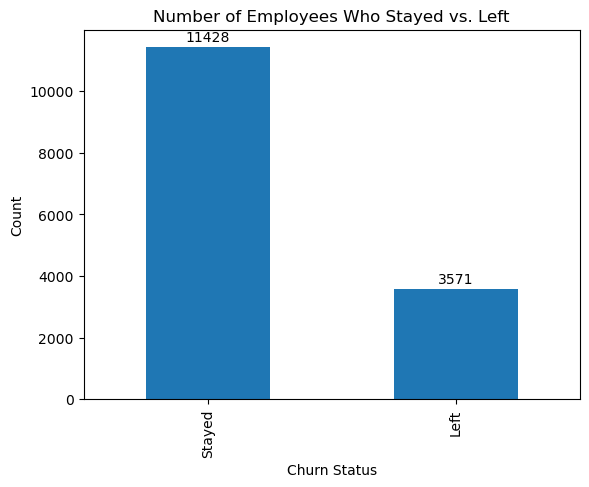

In [11]:
# Calculate the number of employees who stayed/left
churn_counts = data['churn'].value_counts()

# Create a bar plot
churn_counts.plot.bar()

# Set plot labels and title
plt.xlabel('Churn Status')
plt.ylabel('Count')
plt.title('Number of Employees Who Stayed vs. Left')

# Set the x-axis tick labels
plt.xticks([0, 1], ['Stayed', 'Left'])

# Annotate the count values on the bars
for i, count in enumerate(churn_counts):
    plt.text(i, count + 100, str(count), ha='center', va='bottom')

# Display the plot
plt.show()

In this project, my goal is to predict employee turnover using the available data. The variable that one aims to predict is known as target, while everything else that is used for prediction are called features. So, my task will be to use the features to predict the target variable accurately.

## Splitting the data

* To ensure an accurate prediction and develop a useful algorithm, it is common practice in analytics to split data into train and test components. This is also done to reduce `over-fitting`, which means an error that occurs when model works well enough for the dataset it was developed on (train) but is not useful outside of it (test). The train component is used for calculations, optimization, and algorithm development, while the test component is used for validation. 
* Fortunately, the popular Python library, scikit-learn (sklearn), offers built-in functions for various analytics tasks, including train/test splitting. By using the `train_test_split()` function, we can split both the target and feature data into train and test components. The function randomly selects a specified portion, such as 25%, as the test data while keeping the remaining 75% for training. This practice is especially important when dealing with smaller datasets like those in HR analytics.

* train: the component used to develop the model
* test: the component used to validate the model

In [12]:
# Set the target and features

# Choose the dependent variable column (churn) and set it as target
target = data.churn

# Drop column churn and set everything else as features
features = data.drop("churn",axis=1)

In [13]:
# Import the function for splitting dataset into train and test
from sklearn.model_selection import train_test_split

# Use that function to create the splits both for target and for features
# Set the test sample to be 25% of your observations
target_train, target_test, features_train, features_test = train_test_split(target,features,test_size=0.25,random_state=42)

## Predicting employee turnover

* What we want to accomplish is to have an algorithm, that will learn from our historical data the important variables affecting the decision of leaving the company and use that information to predict turnover. As the values of our target, churn, gets are 2: 1 and 0, this problem is called `binary classification`.
* There are many different data science/machine learning algorithms that one can use to address binary classification problem such as prediction of employee turnover. Each of them has its own pros and cons and business cases where they are best to apply. * The algorithm which we will use showed to be quite popular in HR analytics and is called Decision Tree. The latter is popular for two reasons among all: 

    * it is able to provide accurate predictions
    * it can be used to understand factors that are driving the decision to leave the company

In [14]:
# Import the classification algorithm
from sklearn.tree import DecisionTreeClassifier

# Initialize it and call model by specifying the random_state parameter
model = DecisionTreeClassifier(random_state=42)

# Apply a decision tree model to fit features to the target
model.fit(features_train, target_train)

DecisionTreeClassifier(random_state=42)

In [15]:
# Import the graphical visualization export function
from sklearn.tree import export_graphviz

# Apply Decision Tree model to fit Features to the Target
model.fit(features_train,target_train)

# Export the tree to a dot file
export_graphviz(model,"tree.dot")

* The above code can be saved in a file called `tree` in the working directory.
* The contents in it can be copy pasted to `www.webgraphviz.com` and it will generate a graph for the tree which is shown below.

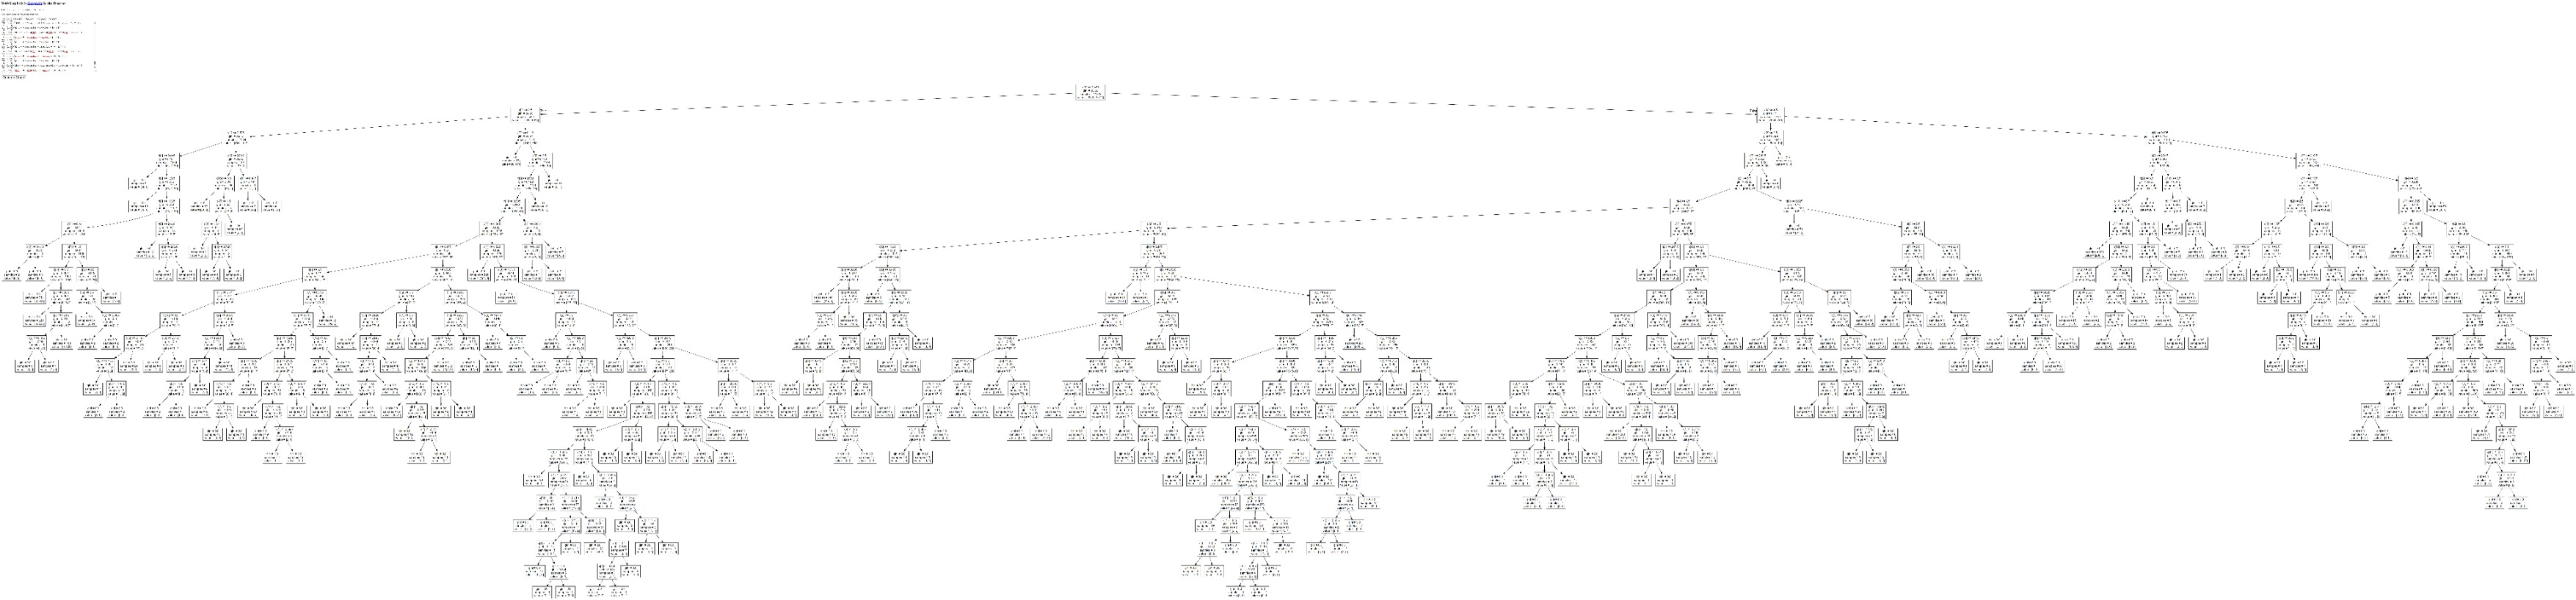

In [16]:
from IPython.display import Image

# Display the image
Image('tree.jpeg')

* We can observe that the tree has a lot of depth and as it keeps going deeper and deeper, it works with smaller number of samples.

Now we will check the performance of the model using the accuracy score on trainig and test datasets.

In [17]:
# Check the accuracy score of the prediction for the training set
print(f'Training Accuracy: {model.score(features_train,target_train)*100:.2f}%')

# Check the accuracy score of the prediction for the test set
print(f'Testing Accuracy: {model.score(features_test,target_test)*100:.2f}%')

Training Accuracy: 100.00%
Testing Accuracy: 97.23%


* As you can see, the accuracy score is perfect on training set, but not that much high on testing set. This is speaking about `overfitting problem`. 
* The reason we have it, is because currently, our tree is growing as much as it can grow, and in the end becomes very large and very specific to training data only. 
* To solve this issue, the growth of the decision tree is usually controlled by:
    * `Pruning` the tree and setting a limit on the maximum depth it can have, or
    * Limiting the minimum number of observations in one leaf of the tree 

Let's go on and apply both separately.

## Control over-fitting by pruning the tree

#### Setting a limit on the maximum depth

In [18]:
# Initialize the DecisionTreeClassifier while limiting the depth of the tree to 5
model_depth_5 = DecisionTreeClassifier(max_depth=5, random_state=42)

# Fit the model
model_depth_5.fit(features_train,target_train)

# Print the accuracy of the prediction for the training set
print(f"Training Accuracy: {model_depth_5.score(features_train,target_train)*100:.2f}%")

# Print the accuracy of the prediction for the test set
print(f"Testing Accuracy: {model_depth_5.score(features_test,target_test)*100:.2f}%")

Training Accuracy: 97.72%
Testing Accuracy: 97.07%


The accuracy has decreased on both sets, but the difference between them is negligible, which means we `reduced overfitting` and current model is `more realistic`. 

#### Limiting the sample size

In [19]:
# Initialize the DecisionTreeClassifier while limiting the sample size in leaves to 100
model_sample_100 = DecisionTreeClassifier(min_samples_leaf=100, random_state=42)

# Fit the model
model_sample_100.fit(features_train,target_train)

# Print the accuracy of the prediction (in percentage points) for the training set
print(f"Training Accuracy: {model_sample_100.score(features_train,target_train)*100:.2f}%")

# Print the accuracy of the prediction (in percentage points) for the test set
print(f"Testing Accuracy: {model_sample_100.score(features_test,target_test)*100:.2f}%")

Training Accuracy: 96.58%
Testing Accuracy: 96.13%


We receive a test accuracy which is again lower, but again, `more realistic` than the old one.

## Evaluating the model

In [20]:
# Import the function to calculate precision score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Predict whether employees will churn using the test set
prediction = model.predict(features_test)

# Calculate precision score by comparing target_test with the prediction
print(f'Precision score: {precision_score(target_test, prediction):.2f}')

# Calculate recall score by comparing target_test with the prediction
print(f'Recall score: {recall_score(target_test, prediction):.2f}')

# Calculate accuravy score by comparing target_test with the prediction
print(f'Accuracy score: {model.score(features_test,target_test):.2f}')

Precision score: 0.92
Recall score: 0.96
Accuracy score: 0.97


* As we want to correctly predict churn, recall score seems to be our target. However, recall alone is not enough, as by only targeting one class, we may have dramatically low accuracy for the other. Thus, a general rule is to use a measure that is not concentrated on one class alone.
* If our target are leavers, we would concentrate on recall, if stayers, then on specificity. But if our target is to have good predictions on both, then probably the best choice is to use AUC score. AUC stands for Area Under Curve and is basically a compound measure that is maximized when both recall and specificity are maximized. To calculate AUC score, one needs to place Recall on vertical, and 1- Specificity on horizontal axis and draw a curve, which is called ROC.

In [21]:
# Import the function to calculate ROC/AUC score
from sklearn.metrics import roc_auc_score

# Use initial model to predict churn (based on features_test)
prediction = model.predict(features_test)

# Calculate ROC/AUC score by comparing target_test with the prediction
print(f'ROC AUC score: {roc_auc_score(target_test, prediction):.2f}')

ROC AUC score: 0.97


To resolve issue of `class imbalance`, we just need to tell Python to balance class weights which will make probability of both churn being 0 and 1 equal to 50%. This will probably `negatively affect the general accuracy` as a result of increased Gini, but AUC and especially Recall should probably be improved, as now both classes are equally important.

In [22]:
# Initialize the DecisionTreeClassifier 
model_depth_5_b = DecisionTreeClassifier(max_depth=5,class_weight="balanced",random_state=42)

# Fit the model
model_depth_5_b.fit(features_train,target_train)

# Print the accuracy of the prediction (in percentage points) for the test set
print("Accuracy: {:.2f}".format(model_depth_5_b.score(features_test,target_test)*100))

Accuracy: 93.71


In [23]:
## Imbalanced model
# Print the recall score
print("Recall imbalanced: {:.2f}".format(recall_score(target_test,prediction)))
# Print the ROC/AUC score
print("ROC AUC imbalanced: {:.2f}".format(roc_auc_score(target_test,prediction)))

# Initialize the model
model_depth_7_b = DecisionTreeClassifier(max_depth=7, random_state=42, class_weight="balanced")
# Fit it to the training component
model_depth_7_b.fit(features_train,target_train)

# Make prediction using test component
prediction_b = model_depth_7_b.predict(features_test)

# Print the recall score for the balanced model
print("\nRecall balanced: {:.2f}".format(recall_score(target_test,prediction_b)))
# Print the ROC/AUC score for the balanced model
print("ROC AUC balanced: {:.2f}".format(roc_auc_score(target_test,prediction_b)))

Recall imbalanced: 0.96
ROC AUC imbalanced: 0.97

Recall balanced: 0.93
ROC AUC balanced: 0.96


# Choosing the best turnover prediction model

* **Hyperparameter tuning**: We just try different values and find the one that provides best possible predictions.
* **GridSearch**: Maximum depth, minimum sample size and similar other parameters that need to be tuned to find the best value are known as hyperparameters. To find the optimal values for those hyperparameters, one needs to create a grid, a list of applicable values that he or she wants to test and then search among those values the one that achieves highest accuracy. 
* **Cross-Validation**: While Train/test split ensures that the model does not overfit training component, hyperparameter tuning may result in overfitting the test component. As a solution, one is encouraged to validate the model on different test components, which is achieved using `Cross Validation`. The latter is general case of Train/test split, as it splits the data into `k` components or folds, where each component has the opportunity of being the `test component`.

#### Cross-validation

* It splits the dataset into a training set and a testing set 
* It fits the model, makes predictions and calculates a score (you can specify if you want the accuracy, precision, recall, etc.)
* It repeats the process k times in total
* It outputs the average of the 10 scores

In [24]:
# Import the function for implementing cross validation
from sklearn.model_selection import cross_val_score

# Use that function to print the cross validation score for 10 folds
print(cross_val_score(model, features, target, cv=10))

[0.98533333 0.98533333 0.974      0.96533333 0.96       0.97933333
 0.99       0.99333333 1.         1.        ]


The cross-validation score for 10 folds is presented as an array of 10 values ranging from 0.96 to 1.0. Each value represents the evaluation score achieved when the model was trained and evaluated using a specific fold of the data.

Here's an interpretation of the result:

* The cross-validation scores indicate the performance of the model across different subsets of the data.
* Scores closer to 1.0 suggest better performance, while lower scores indicate potential areas for improvement.
* The scores in the provided array range from 0.96 to 1.0, indicating generally high performance across the folds.
* The model achieved high accuracy in most folds, with some scores even reaching perfect accuracy (1.0).

Overall, these results suggest that the model performs well and can make accurate predictions across different subsets of the data. However, it's important to note that further analysis and evaluation are necessary to fully assess the model's performance and determine its suitability for the specific task at hand.

#### GridSearch

In [25]:
# import the GridSearchCV function
from sklearn.model_selection import GridSearchCV

# Generate values for maximum depth
depth = [i for i in range(5,21,1)]

# Generate values for minimum sample size
samples = [i for i in range(50,500,50)]

# set up parameters: done
parameters = dict(max_depth=depth, min_samples_leaf=samples)

# initialize the param_search function using the GridSearchCV function, initial model and parameters above
param_search = GridSearchCV(model, parameters, cv=10)

# fit the param_search to the training dataset
param_search.fit(features_train, target_train)

# print the best parameters found
for key, value in param_search.best_params_.items():
    print(f'{key}:', value)

max_depth: 5
min_samples_leaf: 50


Use above hyperparameters to fit a model.

In [26]:
# Initialize the model
model_b = DecisionTreeClassifier(max_depth=7, min_samples_leaf=50, random_state=42, class_weight="balanced")
# Fit it to the training component
model_b.fit(features_train,target_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=7,
                       min_samples_leaf=50, random_state=42)

#### Feature importance

* Once a Decision Tree is developed, sklearn provides a simple way to calculate feature importances. 
* The feature importances represent the relative decrease in the Gini index due to the selection of each feature. These importances are then rescaled to sum up to 100%, with a higher percentage indicating greater importance. 
* Often, the results show that not all features are equally important. In such cases, if we discover that a feature is deemed unimportant, it is advisable to drop it and re-run the model without that particular feature. This way, we can streamline the model and focus on the most relevant features for accurate predictions.

In [27]:
# Calculate feature importances
feature_importances = model_b.feature_importances_

# Create a list of features: done
feature_list = list(features)

# Save the results inside a DataFrame using feature_list as an index
relative_importances = pd.DataFrame(index=feature_list, data=feature_importances, columns=["importance"])

# Sort values to learn most important features
relative_importances.sort_values(by="importance", ascending=False)

,importance
satisfaction,0.475605
time_spend_company,0.368257
evaluation,0.098420
average_montly_hours,0.038886
number_of_projects,0.014152
technical,0.003096
hr,0.000961
salary,0.000622
promotion,0.000000
work_accident,0.000000


In [28]:
# select only features with relative importance higher than 1%
selected_features = relative_importances[relative_importances.importance>0.01]

# create a list from those features: done
selected_list = selected_features.index

# transform both features_train and features_test components to include only selected features
features_train_selected = features_train[selected_list]
features_test_selected = features_test[selected_list]

# Best model

In [29]:
# Initialize the best model using parameters provided in description
model_best = DecisionTreeClassifier(max_depth = 8, min_samples_leaf = 150, class_weight = "balanced", random_state=42)

# Fit the model using only selected features from training set: done
model_best.fit(features_train_selected, target_train)

# Make prediction based on selected list of features from test set
prediction_best = model_best.predict(features_test_selected)

# Print the general accuracy of the model_best
print("Best model accuracy: {:.2f}%".format(model_best.score(features_test_selected, target_test) * 100))

# Print the recall score of the model predictions
print("Best model recall: {:.2f}%".format(recall_score(target_test, prediction_best) * 100))

# Print the ROC/AUC score of the model predictions
print("Best model ROC AUC: {:.2f}%".format(roc_auc_score(target_test, prediction_best) * 100))

Best model accuracy: 95.28%
Best model recall: 91.75%
Best model ROC AUC: 94.07%


This model can now be used to make predictions.